<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Details

In [0]:
"""
Stochastic Gradient Descent

An efficient approach for discriminative learning of linear classifier under
convex loss function SVM and Logistic Regression

+ve :
- Efficiency 
- Ease of Implementation

-ve :
- Number of hyperparameters required
- sensitive to scaling

"""

In [0]:
"""
class SGDClassifer implements plain stochastic gradient descent with different 
loss and penalities

SGDClassifier supports multi-class classification by combining multiple binary 
classifiers in a “one versus all” (OVA) scheme. For each of the K class
a binary classifier is learnt which discriminates itself with K-1 classes.
At the time of testing, we compute the confidence score ie signed distances from 
hyperplane for each classifier and choose the class with higher confidence
"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import SGDClassifier

In [0]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [0]:
X = X[:, :2]

In [0]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X-mean)/std

In [0]:
clf = SGDClassifier(alpha=0.001, max_iter=100, tol=1e-3, shuffle=True).fit(X, y)

In [0]:
x0_min, x0_max = X[:, 0].min() -1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() -1, X[:, 1].max() + 1

In [0]:
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02), np.arange(x1_min, x1_max, 0.02))

In [0]:
Z = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])
Z = Z.reshape(xx0.shape)

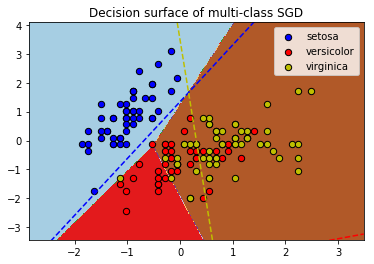

In [18]:
cs = plt.contourf(xx0, xx1, Z, cmap=plt.cm.Paired)

for i, color in zip(clf.classes_, "bry"):
  idx = (y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired, edgecolor='black', s=40)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

  
for i, color in zip(clf.classes_, "bry"):
  plot_hyperplane(i, color)
  
plt.legend()
plt.show()

In [0]:
"""
Note for multiclass: 
"coef_" is a 2-dimensional array of [n_classes, n_features]
"intercept" is a 1-dimensional of [n_classes]
"""

In [0]:
"""SGD Variant 
   Averaged SGD averaging coef of plain SGD over the iterations of sample

"""

In [0]:
clf = SGDClassifier(alpha=0.001, max_iter=100, tol=1e-3, shuffle=True, average=True).fit(X, y)
Z = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])
Z = Z.reshape(xx0.shape)

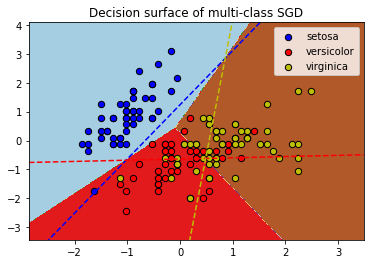

In [21]:
cs = plt.contourf(xx0, xx1, Z, cmap=plt.cm.Paired)

for i, color in zip(clf.classes_, "bry"):
  idx = (y == i)
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired, edgecolor='black', s=40)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

  
for i, color in zip(clf.classes_, "bry"):
  plot_hyperplane(i, color)
  
plt.legend()
plt.show()

In [0]:
"""Conclusion: It gives better resuts atleast for this case"""

In [0]:
"""Similar to SDG Classfier supports loss function squared_loss, huber(robust regression) , epsilon_insensitive(linear SVM)

It supports Ridge, Lasso and ElasticNet regularization (1 - l1_ratio) * L2 + l1_ratio * L1

Complexity for X = (n,p) matrix with k is number of iterations is O(knp_bar) where p_bar is avg number of non zero 
attributes 
"""

In [22]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Stopping Condition

In [0]:
"""
The classes SGDClassifier and SGDRegressor provide two criteria to stop the algorithm

1. early_stopping = True
   Input data is splitted in training and validation set. The model fits using 
   training set but the stopping criterion is based on predicted score computed 
   on validation set.
   
2. early_stopping = False
   All data is used for training, the stopping condition is based on objective function
   computed using input data.
   
"n_iter_no_change" and "max_iter" are used for stopping in case if no improvement for
n number of iterations or max iterations happened.

"""

In [0]:
"""
Tips
Scale the Data before using 

use GridSearchCV to find alpha parameter ( regularization term ) range 10.0**-np.arange(1,7)

set max_iter = np.ceil(10**6 / n)

if PCA is used it is beter to scale by some constant c

Averaged SGD works better

"""